#Importing the packages#################

In [269]:
import numpy as np                                  # Implemennts milti-dimensional array and matrices
import pandas as pd                                 # For data manipulation and analysis
#import pandas_profiling
import matplotlib.pyplot as plt # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns           # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline

In [270]:
#Loading Dataset
insurance_data=pd.read_csv(r"C:\Users\91870\Documents\Akshita Negi\Python\EDA\Risk Analysis EDA\Insurance_data.csv")

In [271]:
insurance_data.shape

(1338, 7)

In [272]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [273]:
insurance_data.head()# top 5 rows

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

##DATA PROFILING################

In [216]:
###Understanding Dataset####

In [274]:
insurance_data.describe() # statistical information of numericl values

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [218]:
# Average charges
avg_charges = insurance_data['charges'].mean()
print(f'Average Charges: {avg_charges}')

Average Charges: 13270.422265141257


In [219]:

# Minimum and maximum charges
min_charges = insurance_data['charges'].min()
max_charges = insurance_data['charges'].max()
print(f'Minimum Charges: {min_charges}, Maximum Charges: {max_charges}')


Minimum Charges: 1121.8739, Maximum Charges: 63770.42801


In [220]:
# Count of customers by region
customers_by_region = insurance_data['region'].value_counts()
print(customers_by_region)


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [221]:
# Count of smokers vs non-smokers
smokers_count = insurance_data['smoker'].value_counts()
print(smokers_count)

smoker
no     1064
yes     274
Name: count, dtype: int64


In [222]:
insurance_data.isnull().sum() # null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* The data has no null values.

##Pre Profiling###########

In [223]:
insurance_data.tail(10)

age     sex     bmi  children smoker     region      charges
1328   23  female  24.225         2     no  northeast  22395.74424
1329   52    male  38.600         2     no  southwest  10325.20600
1330   57  female  25.740         2     no  southeast  12629.16560
1331   23  female  33.400         0     no  southwest  10795.93733
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

In [35]:
pip install ydata-profiling

In [224]:
from ydata_profiling import ProfileReport

In [225]:
insurance_profile = ProfileReport(insurance_data,title='insurance_data_before_processing Report')

In [38]:
insurance_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
insurance_profile.to_file(output_file="insurance_data_before_preprocessing.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##Preprocessing########

* Dealing with duplicate rows
* Find number of duplicate rows in the dataset.
* Print the duplicate entries and analyze.
* Drop the duplicate entries from the dataset.

In [275]:
insurance_data.duplicated().sum() # duplicate values

1

In [276]:
insurance_data.loc[insurance_data.duplicated(),:]

age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

* Removing duplicated values

In [277]:
insurance_data_copy = insurance_data.copy() #copy of dataset
insurance_data_copy.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [278]:
insurance_data_copy.drop_duplicates(keep='first').shape

(1337, 7)

* no duplicate values now

In [61]:
insurance_profile_clean = ProfileReport(insurance_data_copy,title='insurance_post_processing Report')
insurance_profile_clean

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* The data are processed now. The dataset does not contain missing and zero values. The pandas profiling report generated after processing the data giving us more clear data. We can compare the two reports.

Quetions:

1. What is the distribution of insurance charges across different demographics?

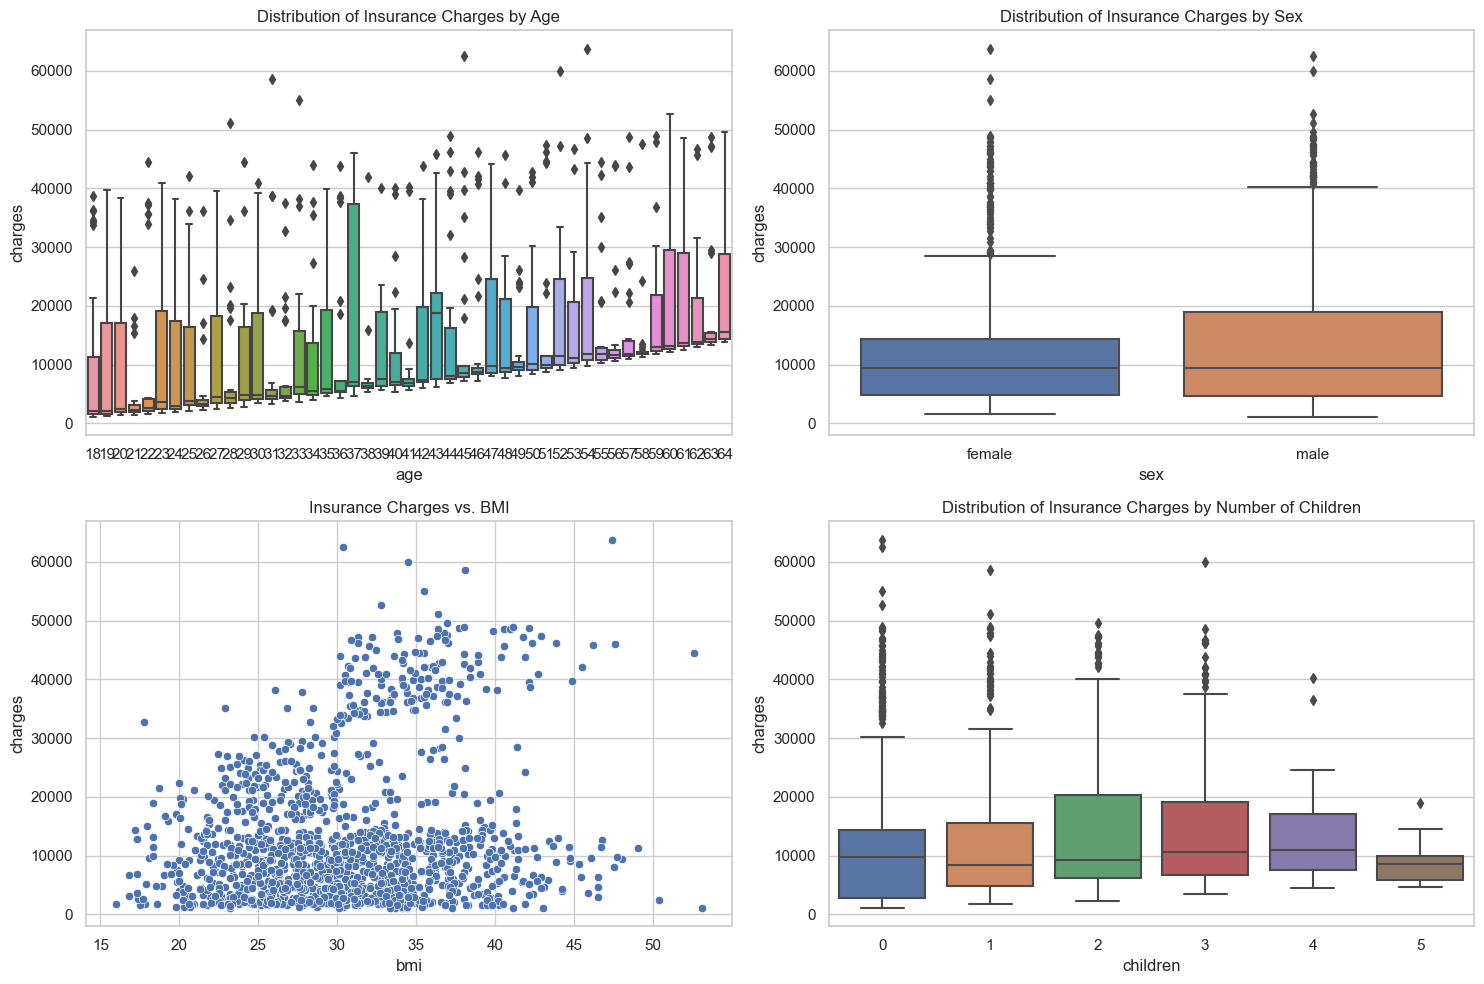

In [279]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Distribution of charges by age
plt.subplot(2, 2, 1)
sns.boxplot(x='age', y='charges', data=insurance_data)
plt.title('Distribution of Insurance Charges by Age')

# Distribution of charges by sex
plt.subplot(2, 2, 2)
sns.boxplot(x='sex', y='charges', data=insurance_data)
plt.title('Distribution of Insurance Charges by Sex')

# Distribution of charges by BMI
plt.subplot(2, 2, 3)
sns.scatterplot(x='bmi', y='charges', data=insurance_data)
plt.title('Insurance Charges vs. BMI')

# Distribution of charges by number of children
plt.subplot(2, 2, 4)
sns.boxplot(x='children', y='charges', data=insurance_data)
plt.title('Distribution of Insurance Charges by Number of Children')

# Adjust layout
plt.tight_layout()
plt.show()

2. What is the distribution of age groups among the insured individuals?

In [232]:
# Create age groups
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
insurance_data['age_group'] = pd.cut(insurance_data['age'], bins=age_bins, labels=age_labels, right=False) #To categorize the ages into defined bins and labels.


In [233]:
# Calculate the distribution of age groups
age_group_distribution = insurance_data['age_group'].value_counts().sort_index()

In [234]:
# Print the distribution
print(age_group_distribution)

age_group
0-18       0
19-25    278
26-35    271
36-45    260
46-55    287
56-65    242
66+        0
Name: count, dtype: int64


C:\Users\91870\anaconda4\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


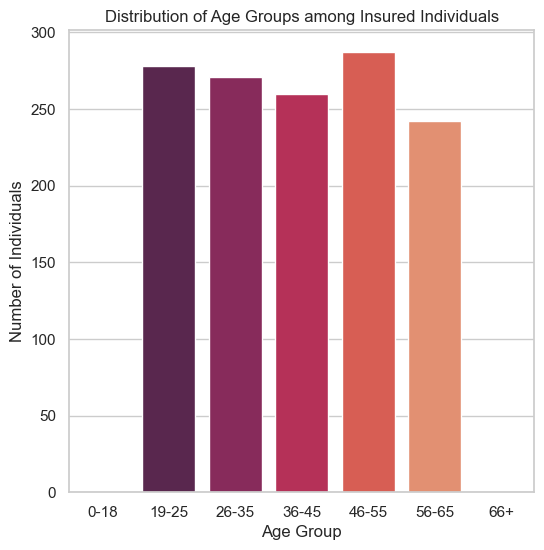

In [280]:
# Visualize the distribution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette=("rocket"))
plt.title('Distribution of Age Groups among Insured Individuals')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.show()

Insights:
* Youth (0-18): Generally, this group might be smaller since younger individuals often rely on their parents' insurance.
* Young Adults (19-25): This group might be larger due to young adults starting their own insurance plans.
* Adults (26-35, 36-45, 46-55): These age groups are usually significant as they represent working-age individuals who are likely to have insurance through employers.
* Pre-Retirement (56-65): This group might also be substantial, as individuals start considering health issues more seriously.
* Senior Citizens (66+): This group is also significant due to increased health risks and higher insurance utilization.

3. What is the correlation between BMI (Body Mass Index) and health insurance claims?

<Axes: xlabel='bmi', ylabel='charges'>

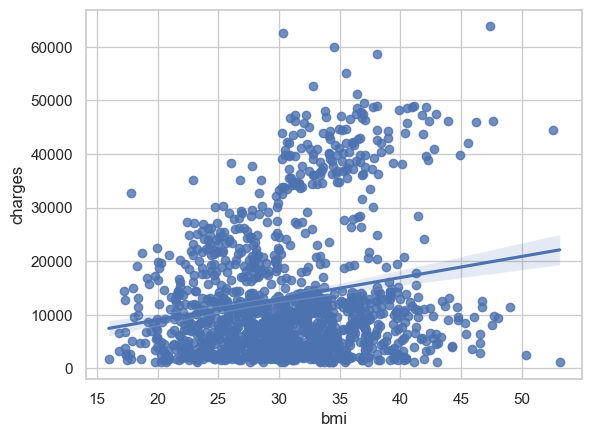

In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x='bmi',y='charges',data = insurance_data)

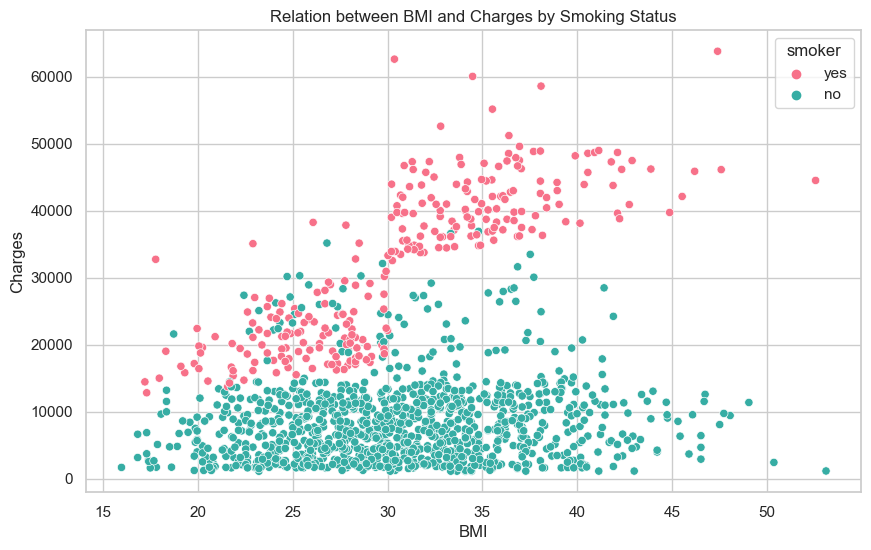

In [282]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=insurance_data, x='bmi', y='charges', hue='smoker', palette='husl')
plt.title('Relation between BMI and Charges by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

Insights:

* There is a general positive trend indicating that as BMI increases, the insurance charges also tend to increase.
Outliers: There are some significant outliers with very high charges, which are likely due to specific health conditions or lifestyle factors not captured by BMI alone.
* Smokers generally incur higher charges compared to non-smokers, even at similar BMI levels.
* For both smokers and non-smokers, higher BMI tends to be associated with higher insurance charges, but the effect is more pronounced for smokers.

4. What is the average cost of health insurance premiums by region?


In [283]:
avg_cost_by_region = insurance_data.groupby('region')['charges'].mean().reset_index()
avg_cost_by_region 

region       charges
0  northeast  13406.384516
1  northwest  12417.575374
2  southeast  14735.411438
3  southwest  12346.937377

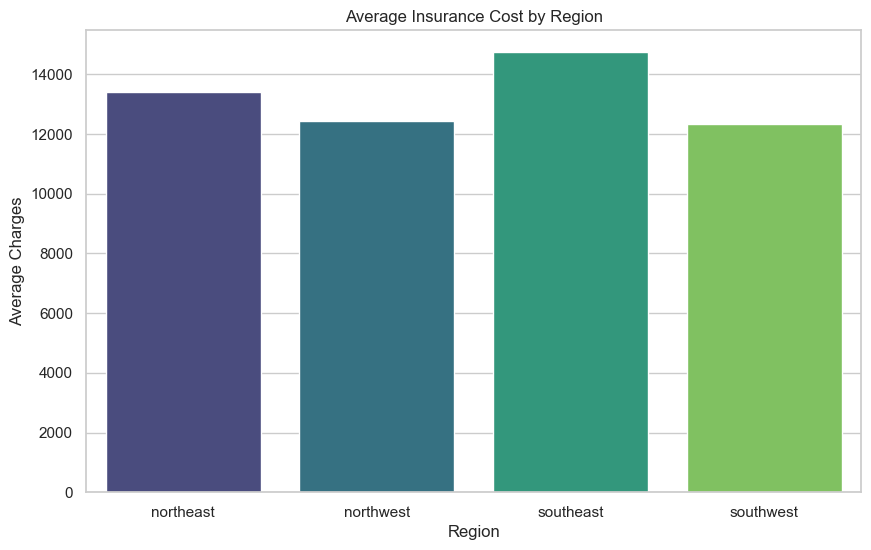

In [284]:
# Visualize the average cost by region
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', data=avg_cost_by_region, palette='viridis')
plt.title('Average Insurance Cost by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

insights:

* The Southeast region has the highest average insurance charges among all regions. This could indicate higher healthcare costs in this area or a higher prevalence of risk factors (e.g., smoking, obesity) that lead to increased charges.
* The Northwest and Southwest regions have the lowest average insurance charges, with the Southwest being slightly lower.
* Differences in healthcare costs across regions can significantly impact insurance charges.

5. Which regions have the highest proportion of smokers?

In [285]:
# Filter smokers
smokers = insurance_data[insurance_data['smoker'] == 'yes']

In [286]:
# Group by region
smokers_by_region = smokers.groupby('region').size().reset_index(name='smoker_count')
smokers_by_region

region  smoker_count
0  northeast            67
1  northwest            58
2  southeast            91
3  southwest            58

In [287]:
# Calculate proportions
proportions = smokers_by_region['smoker_count'] / smokers_by_region['smoker_count'].sum()
proportions

0    0.244526
1    0.211679
2    0.332117
3    0.211679
Name: smoker_count, dtype: float64

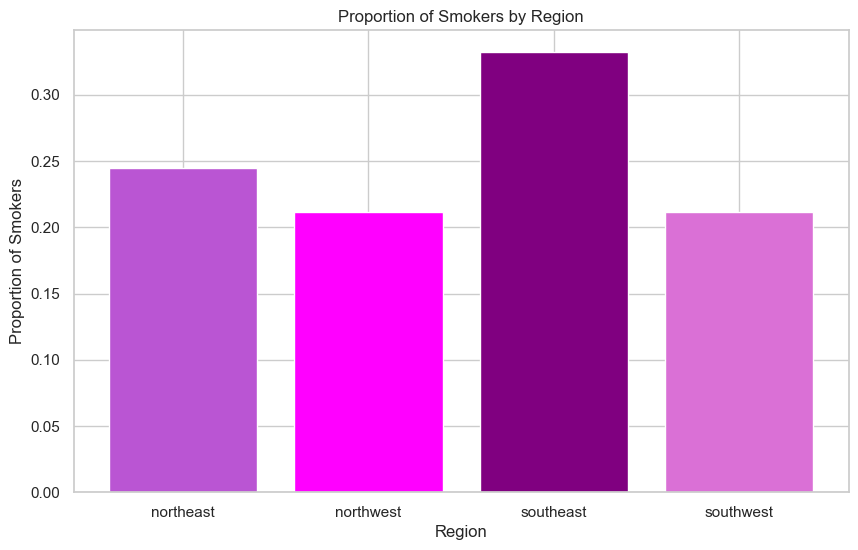

In [288]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.bar(smokers_by_region['region'], proportions,color=('mediumorchid','fuchsia','purple','orchid'))
plt.title('Proportion of Smokers by Region')
plt.xlabel('Region')
plt.ylabel('Proportion of Smokers')
plt.show()

insights:

* The Southeast region has the highest proportion of smokers among all regions. * 
The Northwest and Southwest regions have the lowesproportion of smokerss, with the Southwest being slightly lowers.

6. How do the number of children affect insurance charges?

In [289]:
# Group by the number of children and calculate average charges
average_charges_by_children = insurance_data.groupby('children')['charges'].mean().reset_index()
average_charges_by_children

children       charges
0         0  12365.975602
1         1  12731.171832
2         2  15073.563734
3         3  15355.318367
4         4  13850.656311
5         5   8786.035247

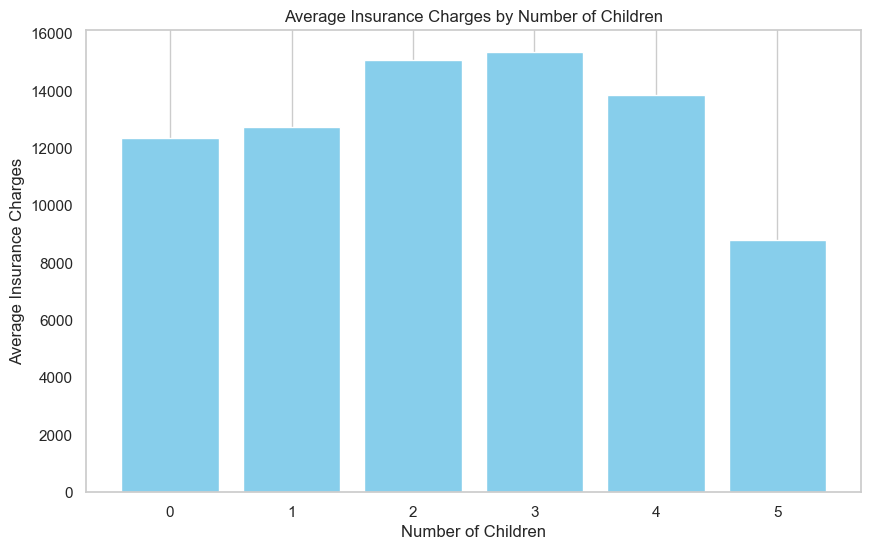

In [290]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(average_charges_by_children['children'], average_charges_by_children['charges'], color='skyblue')
plt.title('Average Insurance Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Insurance Charges')
plt.xticks(average_charges_by_children['children'])  # Set x-ticks to show all children counts
plt.grid(axis='y')
plt.show()

insights:

* The bar chart will show how average insurance charges vary with the number of children. Typically, as the number of children increases, the average insurance charges may also increase due to higher healthcare costs associated with dependents.
* Families with more children may face higher insurance premiums.
* Families with more children might be at a higher risk for claims, necessitating careful underwriting and risk management strategies.

7. What are the key predictors of high claims in the dataset?

In [292]:
# Define high claims threshold (75th percentile)
high_claims_threshold = insurance_data['charges'].quantile(0.75)
high_claims_threshold

16639.912515

In [293]:
# Create a binary column for high claims
insurance_data['high_claims'] = insurance_data['charges'] > high_claims_threshold
insurance_data['high_claims']

0        True
1       False
2       False
3        True
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: high_claims, Length: 1338, dtype: bool

In [294]:
# Analyze key predictors
predictors = ['age', 'bmi', 'children', 'smoker', 'region']
correlation_matrix = insurance_data[predictors + ['high_claims']].copy()
correlation_matrix['smoker'] = correlation_matrix['smoker'].map({'yes': 1, 'no': 0})
correlation_matrix['high_claims'] = correlation_matrix['high_claims'].astype(int)
correlation_matrix['region']=correlation_matrix['region'].astype('category').cat.codes
# Calculate correlations
correlation_values = correlation_matrix.corr()['high_claims'].drop('high_claims')
correlation_values

age         0.040369
bmi         0.061167
children    0.040375
smoker      0.796852
region     -0.013679
Name: high_claims, dtype: float64

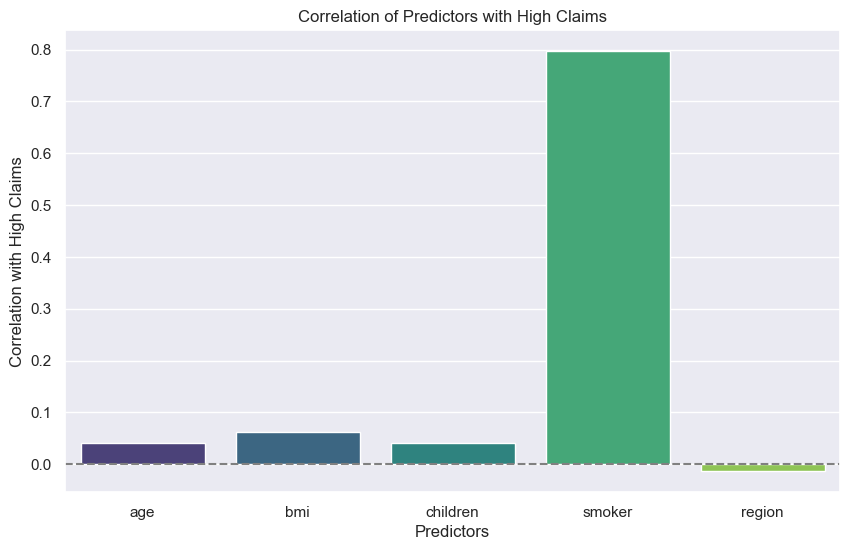

In [311]:
# Visualize the correlation with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_values.index, y=correlation_values.values, palette='viridis')
plt.title('Correlation of Predictors with High Claims')
plt.xlabel('Predictors')
plt.ylabel('Correlation with High Claims')
plt.axhline(0, color='grey', linestyle='--')
plt.show()

insights:

* Smokers are likely to have a higher correlation with high claims due to increased health risks.
* Older individuals show positive correlation, as healthcare needs tend to increase with age.
* Higher BMI values may correlate with higher claims, reflecting the health risks associated with obesity.

8. How does smoking status affect insurance charges?

In [295]:
# Calculate average charges for smokers and non-smokers
average_charges = insurance_data.groupby('smoker')['charges'].mean().reset_index()
average_charges

smoker       charges
0     no   8434.268298
1    yes  32050.231832

In [296]:
from scipy import stats  # for statistical tests

In [297]:
# Perform a t-test to check for significant differences
smokers_charges = insurance_data[insurance_data['smoker'] == 'yes']['charges']
non_smokers_charges = insurance_data[insurance_data['smoker'] == 'no']['charges']
t_stat, p_value = stats.ttest_ind(smokers_charges, non_smokers_charges)
t_stat, p_value

(46.66492117272371, 8.271435842179102e-283)

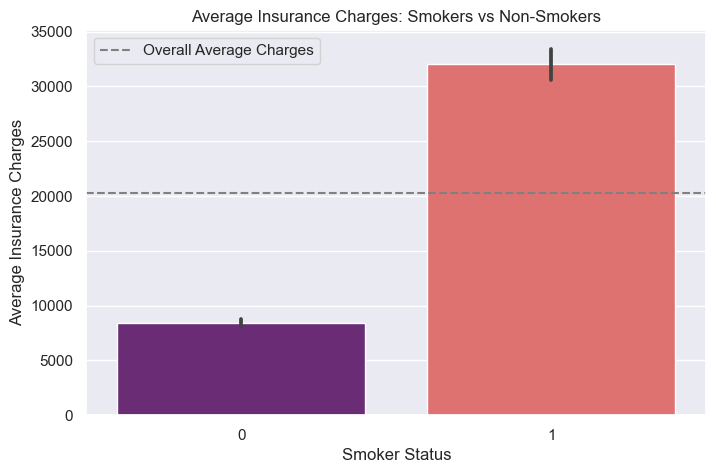

T-statistic: 46.66492117272371, P-value: 8.271435842179102e-283


In [313]:
# Visualize the results
plt.figure(figsize=(8, 5))
sns.barplot(x='smoker', y='charges', data=insurance_data, estimator=lambda x: sum(x) / len(x), palette='magma')
plt.title('Average Insurance Charges: Smokers vs Non-Smokers')
plt.xlabel('Smoker Status')
plt.ylabel('Average Insurance Charges')
plt.axhline(y=average_charges['charges'].mean(), color='grey', linestyle='--', label='Overall Average Charges')
plt.legend()
plt.show()

# Print the t-test results
print(f'T-statistic: {t_stat}, P-value: {p_value}')

Insights:
* Smokers are expected to have higher average charges due to increased health risks.
* The t-test results will indicate whether the difference in average charges is statistically significant. A low p-value (typically < 0.05) suggests that the difference in charges is significant, supporting the hypothesis that smoking status affects insurance charges.
* If smokers incur significantly higher charges, insurers may need to adjust their pricing models to reflect the increased risk associated with smoking. This could lead to higher premiums for smokers compared to non-smokers.

9. What are the correlations among different features?

In [299]:
# Convert categorical variables to numeric for correlation analysis
insurance_data['smoker'] = insurance_data['smoker'].map({'yes': 1, 'no': 0})
insurance_data['sex'] = insurance_data['sex'].map({'male': 1, 'female': 0})
insurance_data['region'] = insurance_data['region'].astype('category').cat.codes  # Convert region to numeric code

In [300]:
# Calculate the correlation matrix
correlation_matrix = insurance_data.corr()
correlation_matrix

age       sex       bmi  children    smoker    region  \
age          1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127   
sex         -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588   
bmi          0.109272  0.046371  1.000000  0.012759  0.003750  0.157566   
children     0.042469  0.017163  0.012759  1.000000  0.007673  0.016569   
smoker      -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181   
region       0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000   
charges      0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208   
high_claims  0.040369  0.064688  0.061167  0.040375  0.796852 -0.013679   

              charges  high_claims  
age          0.299008     0.040369  
sex          0.057292     0.064688  
bmi          0.198341     0.061167  
children     0.067998     0.040375  
smoker       0.787251     0.796852  
region      -0.006208    -0.013679  
charges      1.000000     0.851602  
high_claims  0.851602     1.000000

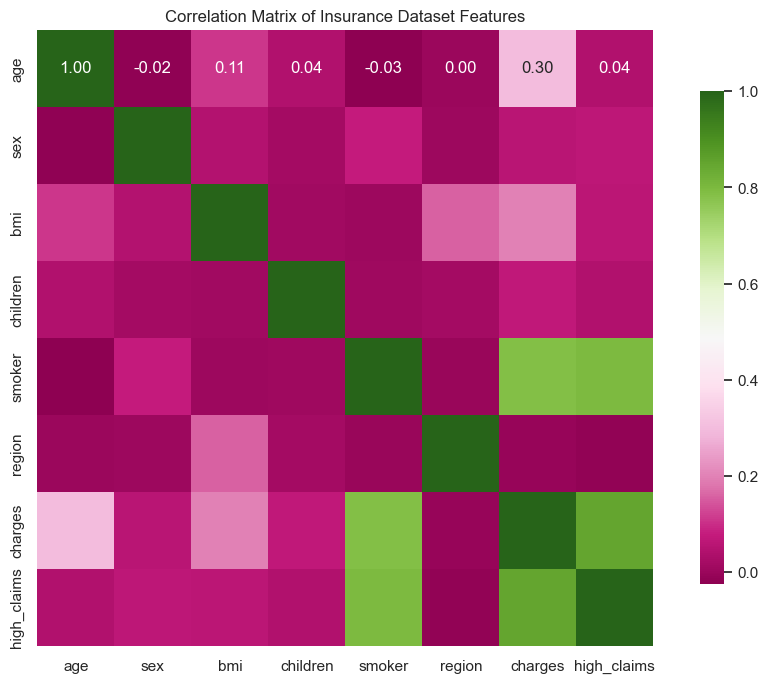

In [308]:
# Set up the matplotlib figure
import seaborn as sns
sns.set()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='PiYG', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Insurance Dataset Features')
plt.show()

Insights:

* A strong positive correlation between age and insurance charges is typically expected, indicating that older individuals tend to incur higher medical costs.
* There may be a positive correlation between BMI and charges, suggesting that higher BMI values are associated with higher healthcare costs.
* A significant positive correlation between smoking status and charges is likely, as smokers generally have higher healthcare costs due to associated health risks.
* The correlation between the number of children and charges may also be positive, indicating that families with more children may incur higher insurance costs.
* The correlation analysis can help identify if certain regions have significantly different insurance charges, which can inform regional pricing strategies.
